<a href="https://colab.research.google.com/github/PraveenKumar08042001/MachineLearning_HW/blob/main/ML_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 4:

1.Data pre-processing is an essential step in the data cleaning process, performed before data classification to enhance model accuracy. In this phase, I have eliminated any null values in the dataset and disregarded irrelevant information or columns that do not contribute to the classification task. For instance, I excluded the "Name" column while ensuring that columns containing vital information, such as "AGE," are filled in. To fill missing values, I utilized the interpolate function, which replaces gaps with the median values. Alternatively, these missing values can be imputed with the column's mean.

2.Upon analyzing the data, it becomes apparent that certain attributes, namely "Name," "Cabin," "Ticket," "SibSp," and "Parch," do not significantly impact the classification process. These attributes can potentially introduce noise and misclassification into the dataset. For instance, the "Ticket" column may vary from person to person based on factors like the date and time of purchase, making it unsuitable for classification. Similarly, other mentioned features do not provide valuable information for the classification task.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Load the dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Display the dataset columns
def display_columns(data):
    print(data.columns)

# Remove irrelevant columns
def remove_irrelevant_columns(data, columns_to_remove):
    return data.drop(columns=columns_to_remove)

# Clean the dataset by removing missing values and duplicates
def clean_dataset(data):
    data = data.dropna()
    data = data.drop_duplicates()
    return data

# Encode categorical variables with one-hot encoding
def encode_categorical_variables(data, categorical_columns):
    encoded_data = []

    for column in categorical_columns:
        encoded_data.append(pd.get_dummies(data[column]))

    return pd.concat(encoded_data, axis=1)

# Drop the original categorical columns
def drop_original_categorical_columns(data, categorical_columns):
    return data.drop(columns=categorical_columns)

# Interpolate missing values in the 'Age' column
def interpolate_missing_age(data):
    data["Age"] = data["Age"].interpolate()
    return data

# Main function to preprocess the dataset
def preprocess_data(file_path, columns_to_remove, categorical_columns):
    data = load_dataset(file_path)
    display_columns(data)
    data = remove_irrelevant_columns(data, columns_to_remove)
    data = clean_dataset(data)
    encoded_data = encode_categorical_variables(data, categorical_columns)
    data = pd.concat([data, encoded_data], axis=1)
    data = drop_original_categorical_columns(data, categorical_columns)
    data = interpolate_missing_age(data)
    return data

# Define file path, columns to remove, and categorical columns
file_path = "/content/test.csv"
columns_to_remove = ["Name", "Cabin", "Ticket"]
categorical_columns = ["Pclass", "Sex", "Embarked"]

# Preprocess the dataset
processed_data = preprocess_data(file_path, columns_to_remove, categorical_columns)
print(processed_data)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId   Age  SibSp  Parch      Fare  1  2  3  female  male  C  Q  S
0            892  34.5      0      0    7.8292  0  0  1       0     1  0  1  0
1            893  47.0      1      0    7.0000  0  0  1       1     0  0  0  1
2            894  62.0      0      0    9.6875  0  1  0       0     1  0  1  0
3            895  27.0      0      0    8.6625  0  0  1       0     1  0  0  1
4            896  22.0      1      1   12.2875  0  0  1       1     0  0  0  1
..           ...   ...    ...    ...       ... .. .. ..     ...   ... .. .. ..
409         1301   3.0      1      1   13.7750  0  0  1       1     0  0  0  1
411         1303  37.0      1      0   90.0000  1  0  0       1     0  0  1  0
412         1304  28.0      0      0    7.7750  0  0  1       1     0  0  0  1
414         1306  39.0      0      0  108.9000  1  0  0       1     0

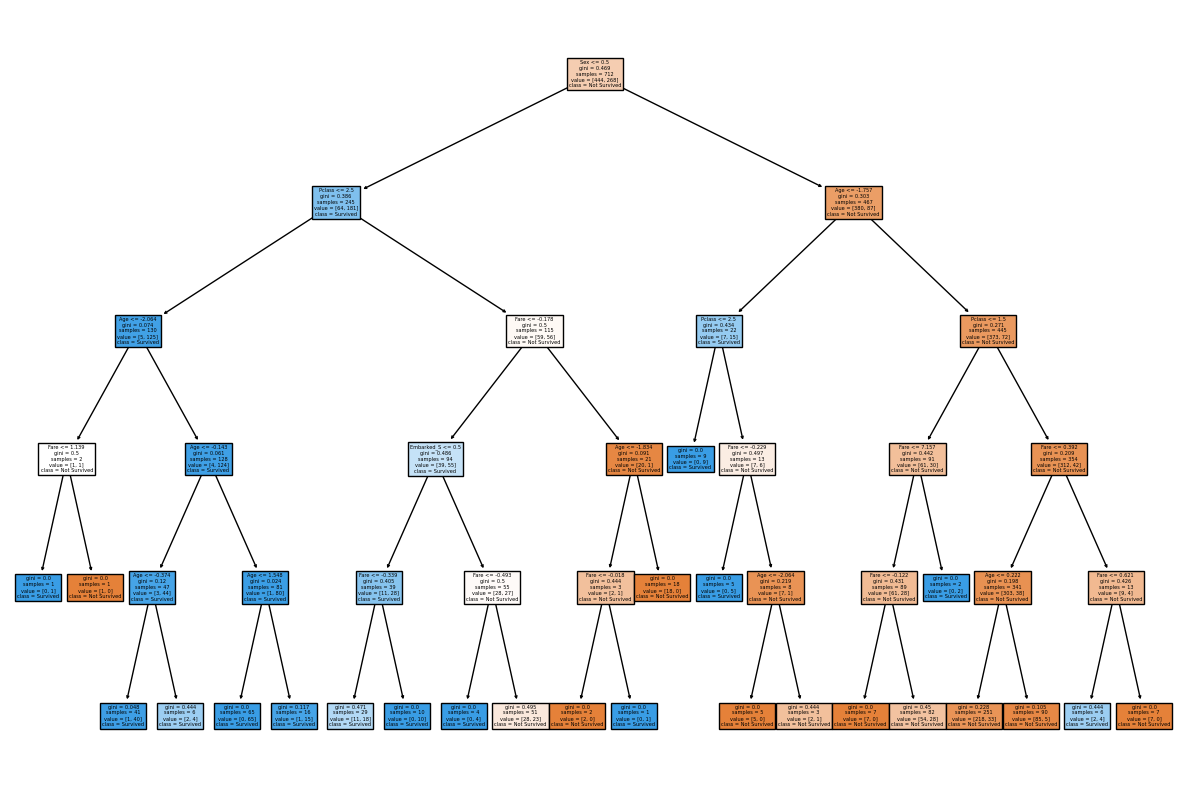

Decision Tree Average Accuracy: 0.82
Random Forest Average Accuracy: 0.82


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Data Preprocessing
# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])

# Feature scaling
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Split data into training and validation sets
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Selection
# You can use feature selection techniques to choose important features based on your analysis.

# 3. Decision Tree Model
# Create and fine-tune a decision tree model
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust hyperparameters
decision_tree.fit(X_train, y_train)

# 4. Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

# 5. Cross-Validation for Decision Tree
decision_tree_scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
decision_tree_avg_accuracy = decision_tree_scores.mean()

# 6. Random Forest Model
# Create and fine-tune a random forest model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)  # You can adjust hyperparameters
random_forest.fit(X_train, y_train)

# 7. Cross-Validation for Random Forest
random_forest_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
random_forest_avg_accuracy = random_forest_scores.mean()

# 8. Comparison
print(f"Decision Tree Average Accuracy: {decision_tree_avg_accuracy:.2f}")
print(f"Random Forest Average Accuracy: {random_forest_avg_accuracy:.2f}")

# 9. Observations and Conclusions
# Analyze and draw conclusions based on the comparison of the two models.


Question 5.

To build a Bagging Classifier for the Titanic challenge using Scikit-Learn, we can follow these steps. A Bagging Classifier is an ensemble method that combines multiple base classifiers (in this case, Decision Trees) to improve predictive performance. Here's how we can do it:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the Titanic dataset (as shown in the previous code)
data = pd.read_csv('train.csv')

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])

# Feature scaling
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Split data into training and validation sets
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fine-tune a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)  # You can adjust hyperparameters

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Evaluate the Bagging Classifier on the validation data
bagging_accuracy = bagging_classifier.score(X_val, y_val)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.80


In this code, we used the BaggingClassifier from Scikit-Learn to create an ensemble of Decision Trees as the base estimator. The base estimator can be any classification algorithm, and in this case, we used a Decision Tree. we can adjust hyperparameters and the number of base estimators (n_estimators) as needed.

The Bagging Classifier combines the predictions from multiple Decision Trees to provide a more robust and accurate model. we can further fine-tune hyperparameters and assess performance on the test data to complete the Titanic challenge.

Question 6.

To build an AdaBoost Classifier for the Titanic challenge using Scikit-Learn, you can follow these steps. AdaBoost is an ensemble method that combines multiple weak classifiers (in this case, Decision Trees) to create a strong classifier. Here's how to do it:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the Titanic dataset (as shown in the previous code)
data = pd.read_csv('train.csv')

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])

# Feature scaling
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Split data into training and validation sets
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fine-tune a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)  # You can adjust hyperparameters

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost Classifier
adaboost_classifier.fit(X_train, y_train)

# Evaluate the AdaBoost Classifier on the validation data
adaboost_accuracy = adaboost_classifier.score(X_val, y_val)
print(f"AdaBoost Classifier Accuracy: {adaboost_accuracy:.2f}")


AdaBoost Classifier Accuracy: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
